<a href="https://colab.research.google.com/github/sunn-123/STOCK_PREDICTION_USING-Machine-learning/blob/main/stock_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

stock data saved to CSV.


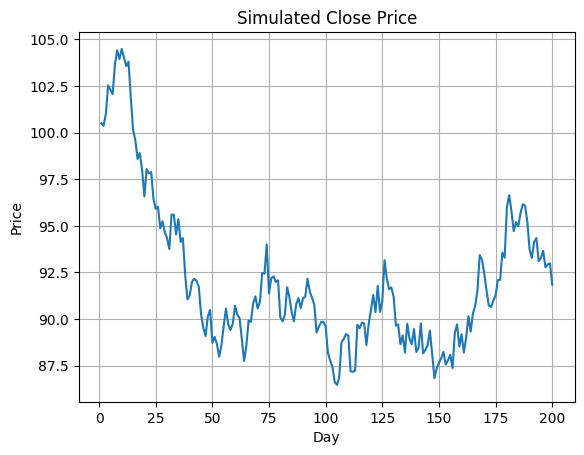

Mean Squared Error: 0.12


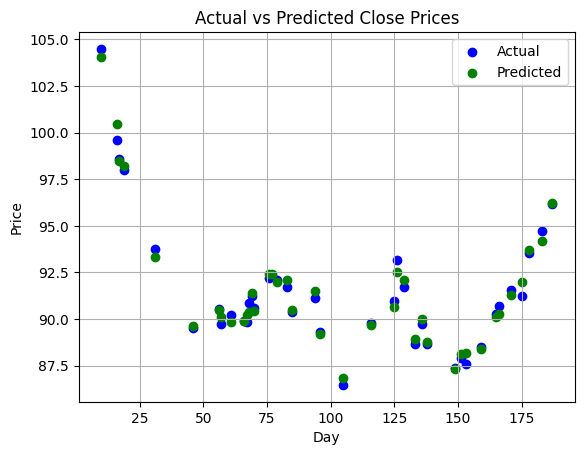

Confusion Matrix:
[[15  4]
 [13  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        19
           1       0.67      0.38      0.48        21

    accuracy                           0.57        40
   macro avg       0.60      0.59      0.56        40
weighted avg       0.60      0.57      0.56        40



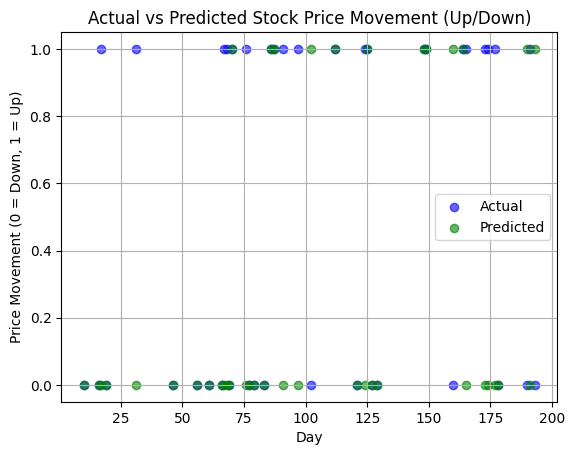

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


np.random.seed(42)
days = np.arange(1, 201)
base_price = 100 + np.cumsum(np.random.normal(0, 1, size=200))  # Random walk

# Generate related features
open_price = base_price + np.random.normal(0, 0.5, size=200)
high_price = np.maximum(base_price, open_price) + np.random.uniform(0, 1, size=200)
low_price = np.minimum(base_price, open_price) - np.random.uniform(0, 1, size=200)
volume = np.random.randint(1000, 10000, size=200)

# Create DataFrame
data = pd.DataFrame({
    'Day': days,
    'Open': open_price,
    'High': high_price,
    'Low': low_price,
    'Volume': volume,
    'Close': base_price  # Target
})




data.to_csv('stock_data.csv', index=False)
print("stock data saved to CSV.")





df = pd.read_csv('stock_data.csv')

# Visualize Close Price
plt.plot(df['Day'], df['Close'])
plt.title('Simulated Close Price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Prepare features and target
X = df[['Day', 'Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



# Make predictions
y_pred = model.predict(X_test)



# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")



#  Visualize results
plt.scatter(X_test['Day'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Day'], y_pred, color='green', label='Predicted')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Generate synthetic stock data (as before)
np.random.seed(42)
days = np.arange(1, 201)
base_price = 100 + np.cumsum(np.random.normal(0, 1, size=200))  # Random walk

# Generate related features
open_price = base_price + np.random.normal(0, 0.5, size=200)
high_price = np.maximum(base_price, open_price) + np.random.uniform(0, 1, size=200)
low_price = np.minimum(base_price, open_price) - np.random.uniform(0, 1, size=200)
volume = np.random.randint(1000, 10000, size=200)

# Create DataFrame
data = pd.DataFrame({
    'Day': days,
    'Open': open_price,
    'High': high_price,
    'Low': low_price,
    'Volume': volume,
    'Close': base_price  # Target
})

# Step 3: Create a binary target variable
# 1 if the price goes up the next day, 0 if it goes down
data['Next_Close'] = data['Close'].shift(-1)
data['Price_Up'] = (data['Next_Close'] > data['Close']).astype(int)

# Drop the last row as it won't have a 'Next_Close'
data = data[:-1]

# Step 4: Prepare features and target
X = data[['Day', 'Open', 'High', 'Low', 'Volume']]
y = data['Price_Up']

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate performance with classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# Step 9: Visualize the actual vs predicted labels
plt.scatter(X_test['Day'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['Day'], y_pred, color='green', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted Stock Price Movement (Up/Down)')
plt.xlabel('Day')
plt.ylabel('Price Movement (0 = Down, 1 = Up)')
plt.legend()
plt.grid(True)
plt.show()